# Fraud Detection Analysis

**With this dataset I want to understand what factors indicate that a transaction is fraud and find any trends within all these fraud transactions, also comparing it with transactions that are not fraud**

In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fraud-detection-example/fraud_dataset_example.csv


In [2]:
df = pd.read_csv('/kaggle/input/fraud-detection-example/fraud_dataset_example.csv')

In [3]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Understanding the columns:

1. step is the unit of time which according to this data source is 1 hour
2. type is the transaction type (CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER)
3. amount is the transaction amount
4. nameOrig is the transaction originator, this may indicate the person sending the payment
5. oldbalanceOrg is the initial balance (before transaction)
6. newbalanceOrig is the new balance (after transaction)
7. nameDest is the transaction recipient, person receiving the payment
8. oldbalanceDest is the initial balance before transaction.
9. newbalanceDest is the new balance after transaction.
10. isFraud is when a Fraud agent takes control of customers accounts and attempts to empty it by transferring to another account and then cashing out.
11. isFlaggedFraud is an illegal attempt to transfer massive amount of money in a single transaction.

In [4]:
# Identifying any null values
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


<AxesSubplot:>

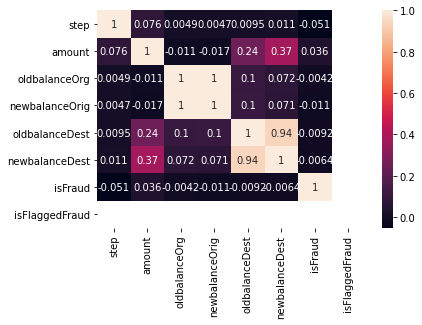

In [7]:
sns.heatmap(df.corr(), annot=True)

isFraud seems to have more correlation with the amount and that is true since most frauds are detected based on how large the transacion amount is

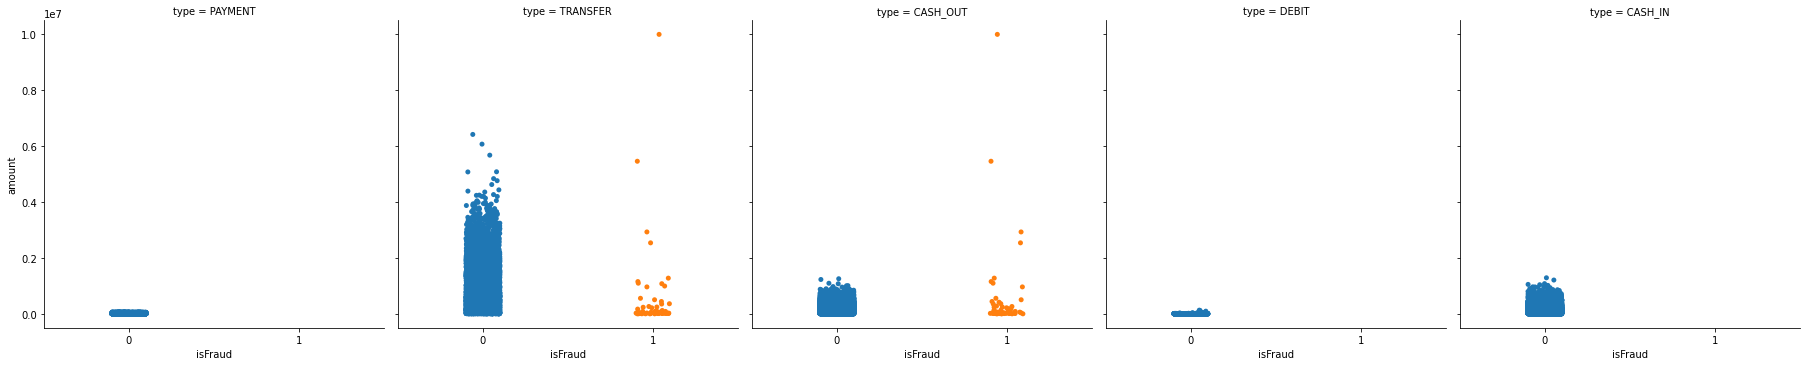

In [8]:
sns.catplot(x="isFraud", y="amount", col="type", data=df)

0 = Not Fraud

1 = Fraud

with this graph we can see that most transactions detected fraud are not just large transactions, many small amounts are also detected as fraud, but there seems to be many abnormalities within this trend, two transactions are very high.
But we can see that normal transactions have a very linear trend and all fraud transactions are either a Transfer or a cash out.

So with this information, I think there are other factors that influence this detection and not just how large the amount is.

According to the heatmap, the next thing after amount that has more correlation with isfraud is newbalanceOrig and then oldbalanceOrg

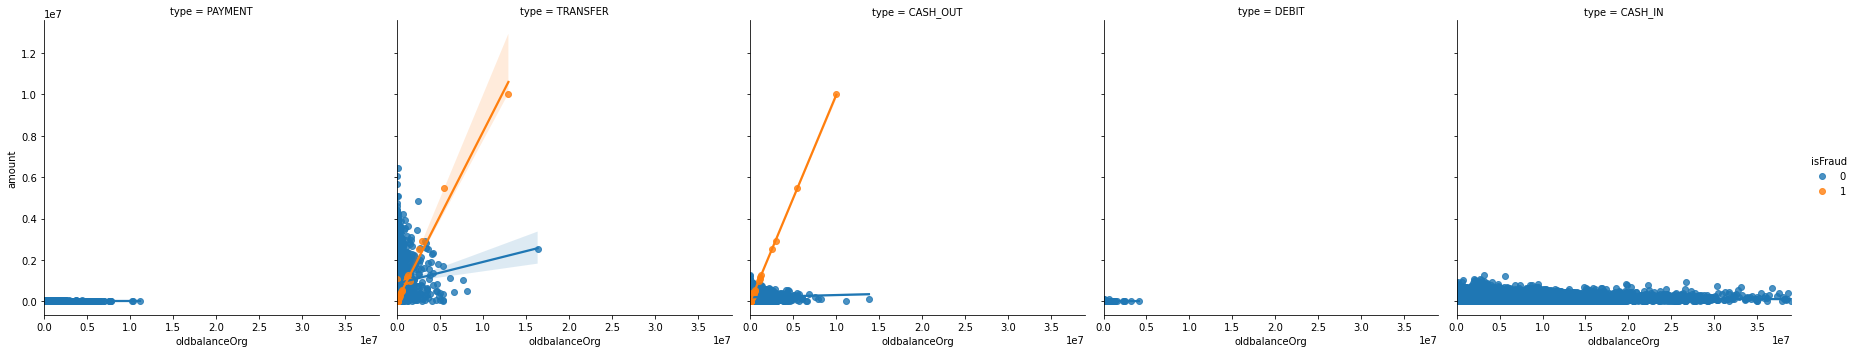

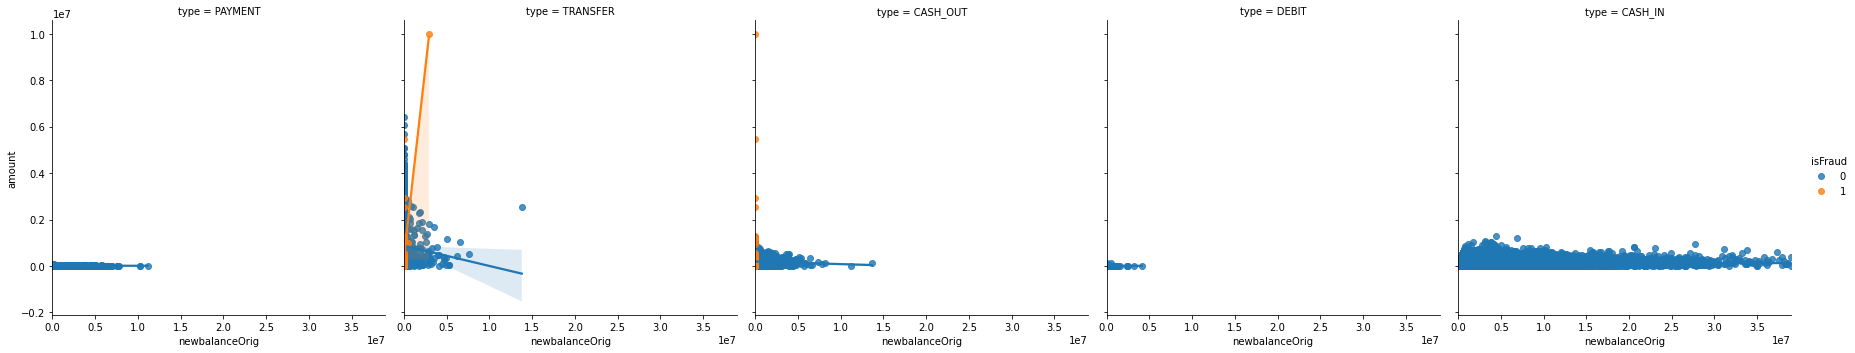

In [9]:
sns.lmplot(x="oldbalanceOrg", y="amount", hue="isFraud", col="type", data=df)
sns.lmplot(x="newbalanceOrig", y="amount", hue="isFraud", col="type", data=df)

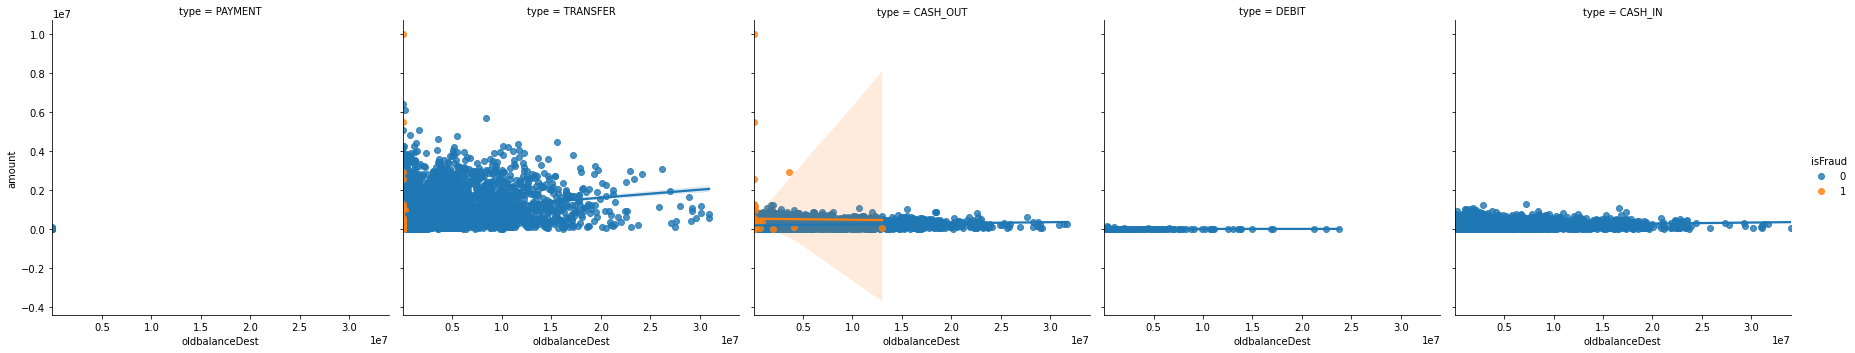

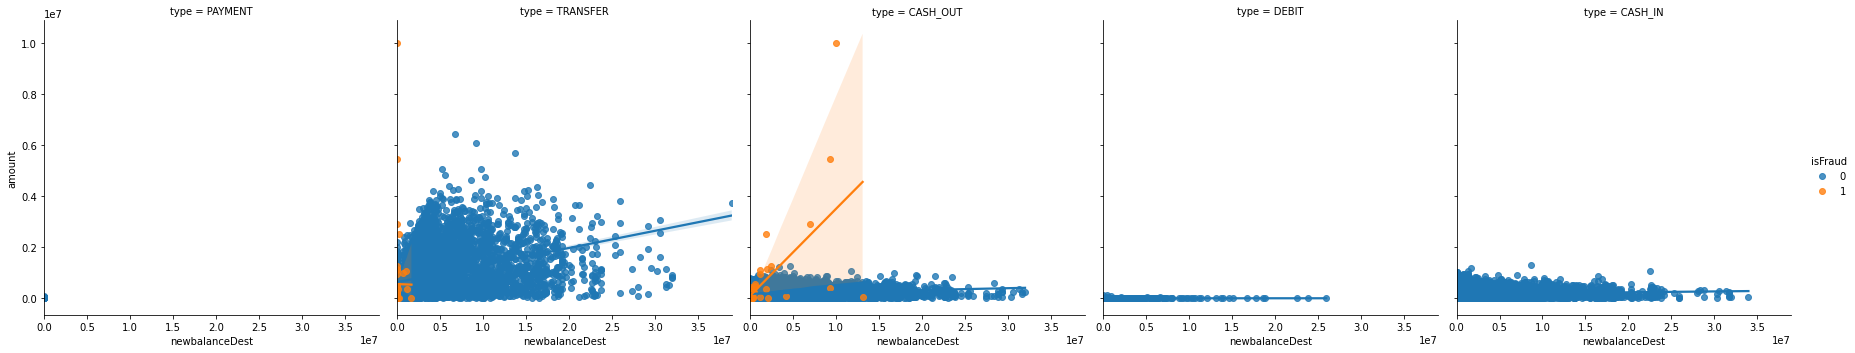

In [10]:
sns.lmplot(x="oldbalanceDest", y="amount", hue="isFraud", col="type", data=df)
sns.lmplot(x="newbalanceDest", y="amount", hue="isFraud", col="type", data=df)

We can see more abnormalities in the cash out type so we can say this category is also influencing the fraud

**We will take look at the highest transaction for both fraud and normal transaction**

In [11]:
df[df['isFraud'] == 0]['amount'].nlargest(10)

84416    6419835.27
66040    6072832.27
16720    5677662.29
87582    5082871.40
73968    5077695.81
87126    4838196.22
46199    4764218.76
44942    4626419.46
58769    4435382.87
77893    4391142.82
Name: amount, dtype: float64

The top 10 normal transactions have a close value

In [12]:
df[df['isFraud'] == 1]['amount'].nlargest(10)

4440     10000000.00
4441     10000000.00
10395     5460002.91
10396     5460002.91
4442      2930418.44
4443      2930418.44
49825     2539898.07
49826     2539898.07
969       1277212.77
970       1277212.77
Name: amount, dtype: float64

While the top 10 fraud transactions have a very diverse range

In [13]:
fraud = df[df['isFraud'] == 1]['amount'].max()
not_fraud = df[df['isFraud'] == 0]['amount'].max()

print("Highest amount for fraud transaction:", fraud)
print("Highest amount for noraml transaction:", not_fraud)

print("\nHigest Fraud Transaction is", fraud - not_fraud, "times more than the highest normal transaction")

Highest amount for fraud transaction: 10000000.0
Highest amount for noraml transaction: 6419835.27

Higest Fraud Transaction is 3580164.7300000004 times more than the highest normal transaction


Now lets compare their balances

In [14]:
df[df['amount'] == fraud]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,4,TRANSFER,10000000.0,C7162498,12930418.44,2930418.44,C945327594,0.0,0.00,1,0
4441,4,CASH_OUT,10000000.0,C351297720,10000000.00,0.00,C766681183,0.0,9941904.21,1,0


In both these cases, the amount was very high

In the second row, we can see that all the balance was send as a transaction, leaving nothing behind

In [15]:
df[df['amount'] == not_fraud]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
84416,10,TRANSFER,6419835.27,C890128330,31784.0,0.0,C1192472312,0.0,6691744.85,0,0


After transaction, there is still a good amount left, not showing anything suspicious

# Summary of Analysis

What indicates whether a transaction is fraud:
1. An abnormally large transaction amount 
2. If the balance after transaction is very low or close to none
3. CASH_OUT and TRANSFER type of transaction is more likely to be a fraud